In [15]:
import os
import numpy as np
import cv2

data_path = '/content/drive/MyDrive/python/data/OCT2017/'
name_path = ['CNV','DME','DRUSEN','NORMAL']
image_rows = 128
image_cols = 128

print(data_path)
print(name_path)

/content/drive/MyDrive/python/data/OCT2017/
['CNV', 'DME', 'DRUSEN', 'NORMAL']


In [16]:
def get_image(path):

  class_data_path = data_path + name_path[path] 
  image_file_names = os.listdir(class_data_path)

  total = len(image_file_names)

  imgs = np.ndarray((total, image_rows, image_cols), dtype=np.uint8)

  i = 0
  print('-'*30)
  print('Creating images...')
  print('-'*30)
  for image_name in image_file_names:
    file_name = os.path.join(class_data_path, image_name)
    print (file_name)
    img = cv2.imread(file_name,cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (image_cols, image_rows))
    imgs[i] = img
    i = i + 1

  return imgs

In [17]:
# tmp_img 에 차례대로 넣는다 
tmp_img = np.ndarray((5000, image_rows, image_cols), dtype=np.uint8)
tmp_img_label = np.ndarray((5000), dtype=np.object)

total = 0
for i in range(4):
  
    cur_img = get_image(i)

    tmp_img[total:total+cur_img.shape[0]] = cur_img
    tmp_img_label[total:total+cur_img.shape[0]] = name_path[i]

    total = total + cur_img.shape[0]
    print (total)



all_img = np.ndarray((total, image_rows, image_cols), dtype=np.uint8)
all_img_label = np.ndarray((total), dtype=np.uint8)

all_img = tmp_img[0:total]
all_img_label = tmp_img_label[0:total]

random_index = np.random.choice(all_img.shape[0], all_img.shape[0], replace=False)

size_80 = int(0.8*all_img.shape[0])

train_imgs = all_img[random_index[:size_80]]
train_labels = all_img_label[random_index[:size_80]]
test_imgs = all_img[random_index[size_80:all_img.shape[0]]]
test_labels = all_img_label[random_index[size_80:all_img.shape[0]]]


------------------------------
Creating images...
------------------------------
/content/drive/MyDrive/python/data/OCT2017/CNV/CNV-103044-11.jpeg
/content/drive/MyDrive/python/data/OCT2017/CNV/CNV-103044-105.jpeg
/content/drive/MyDrive/python/data/OCT2017/CNV/CNV-103044-100.jpeg
/content/drive/MyDrive/python/data/OCT2017/CNV/CNV-103044-102.jpeg
/content/drive/MyDrive/python/data/OCT2017/CNV/CNV-103044-104.jpeg
/content/drive/MyDrive/python/data/OCT2017/CNV/CNV-103044-115.jpeg
/content/drive/MyDrive/python/data/OCT2017/CNV/CNV-103044-106.jpeg
/content/drive/MyDrive/python/data/OCT2017/CNV/CNV-103044-112.jpeg
/content/drive/MyDrive/python/data/OCT2017/CNV/CNV-103044-111.jpeg
/content/drive/MyDrive/python/data/OCT2017/CNV/CNV-103044-107.jpeg
/content/drive/MyDrive/python/data/OCT2017/CNV/CNV-103044-113.jpeg
/content/drive/MyDrive/python/data/OCT2017/CNV/CNV-103044-103.jpeg
/content/drive/MyDrive/python/data/OCT2017/CNV/CNV-103044-109.jpeg
/content/drive/MyDrive/python/data/OCT2017/CNV/CN

CNV


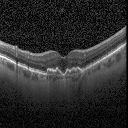

NORMAL


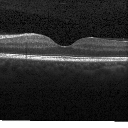

In [23]:
from google.colab.patches import cv2_imshow
print (train_labels[1])
cv2_imshow(train_imgs[1])

print (test_labels[1])
cv2_imshow(test_imgs[1])